In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import tensorflow as tf
from sklearn.metrics import mean_absolute_error

C:\Users\ychong4\Anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df_1min = pd.read_csv("BTCUSDT.csv")

In [3]:
df_1min

,timestamp,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
0,2017-08-17 04:00:00,4261.48,4261.48,4261.48,4261.48,1.775183,2017-08-17 04:00:59.999,7564.906851,3,0.075183,320.390851,0
1,2017-08-17 04:01:00,4261.48,4261.48,4261.48,4261.48,0.000000,2017-08-17 04:01:59.999,0.000000,0,0.000000,0.000000,0
2,2017-08-17 04:02:00,4280.56,4280.56,4280.56,4280.56,0.261074,2017-08-17 04:02:59.999,1117.542921,2,0.261074,1117.542921,0
3,2017-08-17 04:03:00,4261.48,4261.48,4261.48,4261.48,0.012008,2017-08-17 04:03:59.999,51.171852,3,0.012008,51.171852,0
4,2017-08-17 04:04:00,4261.48,4261.48,4261.48,4261.48,0.140796,2017-08-17 04:04:59.999,599.999338,1,0.140796,599.999338,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3694985,2024-09-01 02:56:00,58523.97,58525.25,58510.90,58525.25,14.540600,2024-09-01 02:56:59.999000,850852.611957,620,6.681600,390959.012362,0
3694986,2024-09-01 02:57:00,58525.25,58525.25,58515.00,58515.01,5.911790,2024-09-01 02:57:59.999000,345975.996693,282,1.108400,64864.339668,0
3694987,2024-09-01 02:58:00,58515.01,58537.00,58515.01,58536.99,3.968540,2024-09-01 02:58:59.999000,232268.667325,594,3.919100,229374.809962,0
3694988,2024-09-01 02:59:00,58537.00,58540.25,58523.73,58540.25,6.929350,2024-09-01 02:59:59.999000,405564.074637,540,4.051810,237139.032067,0


In [4]:
df_1min = df_1min.drop(columns=["close_time", "ignore", "number_of_trades", "quote_asset_volume", "taker_buy_base_asset_volume",
                     "taker_buy_quote_asset_volume"])
df_1min = df_1min.rename(columns={'timestamp': 'Timestamp', 'open': 'Open', 'close': 'Close', 'high': 'High', 'low': "Low", 'volume': 'Volume'})

In [5]:
df_1min['Timestamp'] = pd.to_datetime(df_1min['Timestamp'])
df_1min.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3694990 entries, 0 to 3694989
Data columns (total 6 columns):
 #   Column     Dtype         
---  ------     -----         
 0   Timestamp  datetime64[ns]
 1   Open       float64       
 2   High       float64       
 3   Low        float64       
 4   Close      float64       
 5   Volume     float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 169.1 MB


In [6]:
df_1min.describe()

,Timestamp,Open,High,Low,Close,Volume
count,3694990,3.694990e+06,3.694990e+06,3.694990e+06,3.694990e+06,3.694990e+06
mean,2021-02-24 18:28:13.767300352,2.462937e+04,2.464274e+04,2.461586e+04,2.462937e+04,4.861313e+01
min,2017-08-17 04:00:00,2.830000e+03,2.830000e+03,2.817000e+03,2.817000e+03,0.000000e+00
25%,2019-05-24 11:08:15,8.279220e+03,8.285000e+03,8.272972e+03,8.279330e+03,1.026476e+01
50%,2021-02-25 10:52:30,1.912505e+04,1.913253e+04,1.911657e+04,1.912512e+04,2.187966e+01
75%,2022-11-29 13:53:45,3.862827e+04,3.865518e+04,3.860304e+04,3.862843e+04,4.878534e+01
max,2024-09-01 03:00:00,7.377555e+04,7.377700e+04,7.368261e+04,7.377554e+04,5.877775e+03
std,NaN,1.919614e+04,1.920528e+04,1.918698e+04,1.919616e+04,9.196444e+01


In [7]:
# Check missing values
df_1min.isnull().sum()

Timestamp    0
Open         0
High         0
Low          0
Close        0
Volume       0
dtype: int64

### Create a 5min, hourly, daily, weekly, and monthly datasets

In [8]:
formula = {'Open': 'first', 'Close': 'last', 'High': 'max', 'Low': 'min', 'Volume': 'sum'}

df_dummy = df_1min.set_index('Timestamp')

# Create 5 min dataset

df_5min = df_dummy.resample('5min').agg(formula)

# Create hourly dataset

df_hourly = df_dummy.resample('h').agg(formula)

# Create daily dataset

df_daily = df_dummy.resample('D').agg(formula)

# Create weekly dataset

df_weekly = df_dummy.resample('W').agg(formula)

# Create monthly dataset

df_monthly = df_dummy.resample('M').agg(formula)

C:\Users\ychong4\AppData\Local\Temp\ipykernel_8944\3607084394.py:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df_dummy.resample('M').agg(formula)


In [9]:
# Check dataset length

print("5_min dataset length:", len(df_5min))
print("Hourly dataset length:", len(df_hourly))
print("Daily dataset length:", len(df_daily))
print("Weekly dataset length:", len(df_weekly))
print("Monthly dataset length:", len(df_monthly))

5_min dataset length: 740725
Hourly dataset length: 61728
Daily dataset length: 2573
Weekly dataset length: 368
Monthly dataset length: 86


In [10]:
# Create moving average variables in the datasets
df_1min['MA20'] = df_1min['Close'].rolling(window=20).mean()
df_1min['MA50'] = df_1min['Close'].rolling(window=50).mean()
df_1min['MA200'] = df_1min['Close'].rolling(window=200).mean()

df_5min['MA20'] = df_5min['Close'].rolling(window=20).mean()
df_5min['MA50'] = df_5min['Close'].rolling(window=50).mean()
df_5min['MA200'] = df_5min['Close'].rolling(window=200).mean()

df_hourly['MA20'] = df_hourly['Close'].rolling(window=20).mean()
df_hourly['MA50'] = df_hourly['Close'].rolling(window=50).mean()
df_hourly['MA200'] = df_hourly['Close'].rolling(window=200).mean()

df_daily['MA20'] = df_daily['Close'].rolling(window=20).mean()
df_daily['MA50'] = df_daily['Close'].rolling(window=50).mean()
df_daily['MA200'] = df_daily['Close'].rolling(window=200).mean()

df_weekly['MA20'] = df_weekly['Close'].rolling(window=20).mean()
df_weekly['MA50'] = df_weekly['Close'].rolling(window=50).mean()
df_weekly['MA200'] = df_weekly['Close'].rolling(window=200).mean()

df_monthly['MA20'] = df_monthly['Close'].rolling(window=20).mean()
df_monthly['MA50'] = df_monthly['Close'].rolling(window=50).mean()
df_monthly['MA200'] = df_monthly['Close'].rolling(window=200).mean()

In [11]:
# Create percentage change variable

df_1min['Pct_change'] = df_1min['Close'].pct_change()
df_5min['Pct_change'] = df_5min['Close'].pct_change()
df_hourly['Pct_change'] = df_hourly['Close'].pct_change()
df_daily['Pct_change'] = df_daily['Close'].pct_change()
df_weekly['Pct_change'] = df_weekly['Close'].pct_change()
df_monthly['Pct_change'] = df_monthly['Close'].pct_change()

C:\Users\ychong4\AppData\Local\Temp\ipykernel_8944\972642953.py:4: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_5min['Pct_change'] = df_5min['Close'].pct_change()
C:\Users\ychong4\AppData\Local\Temp\ipykernel_8944\972642953.py:5: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_hourly['Pct_change'] = df_hourly['Close'].pct_change()


## Data Visualization

### 1. Visualize Daily, Weekly, and Monthly BTC Chart

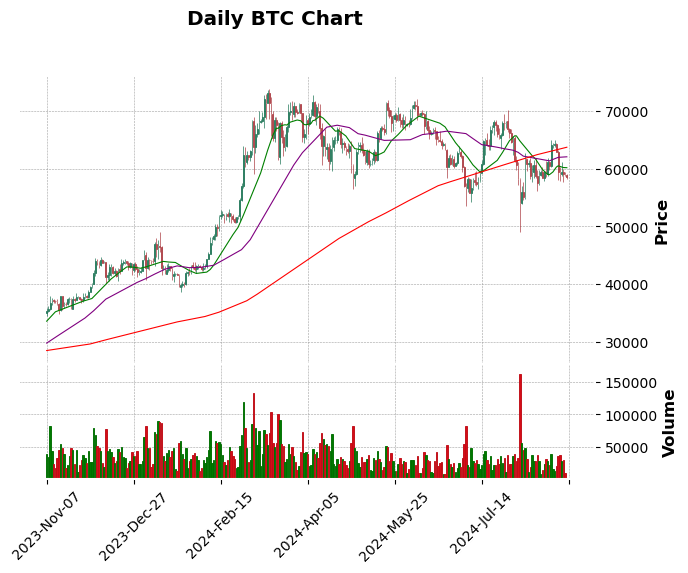

In [12]:
add_plots = [
    mpf.make_addplot(df_daily[-300:]['MA20'], color = 'green', linestyle = '-', width=0.8),
    mpf.make_addplot(df_daily[-300:]['MA50'], color = 'purple', linestyle = '-', width=0.8),
    mpf.make_addplot(df_daily[-300:]['MA200'], color = 'red', linestyle = '-', width=0.8),
]

mpf.plot(df_daily[-300:], type='candle', style='charles', title='Daily BTC Chart', ylabel='Price', volume=True, addplot=add_plots)


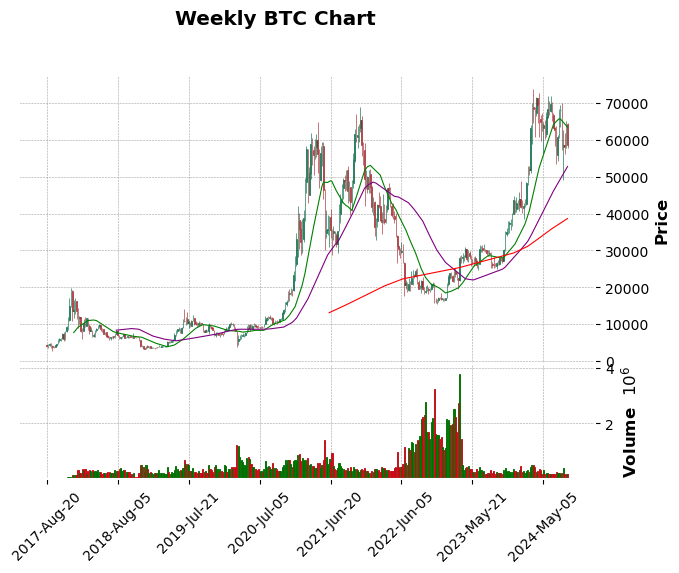

In [13]:
add_plots = [
    mpf.make_addplot(df_weekly['MA20'], color = 'green', linestyle = '-', width=0.8),
    mpf.make_addplot(df_weekly['MA50'], color = 'purple', linestyle = '-', width=0.8),
    mpf.make_addplot(df_weekly['MA200'], color = 'red', linestyle = '-', width=0.8),
]

mpf.plot(df_weekly, type='candle', style='charles', title='Weekly BTC Chart', ylabel='Price', volume=True, addplot=add_plots)

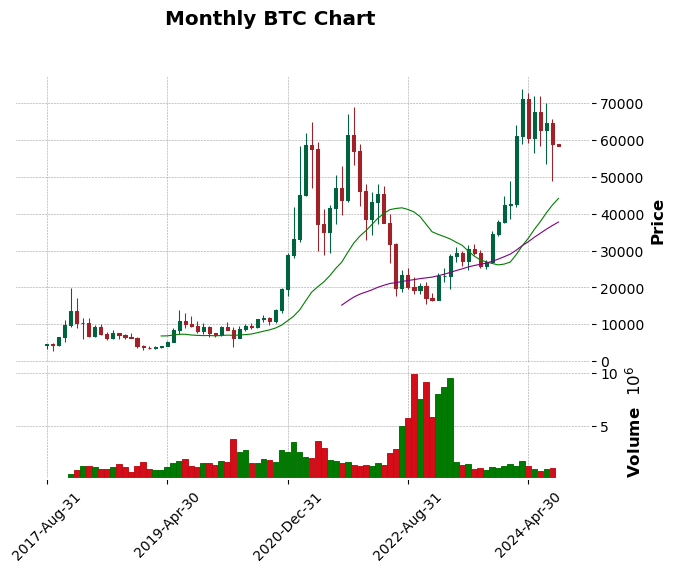

In [14]:
add_plots = [
    mpf.make_addplot(df_monthly['MA20'], color = 'green', linestyle = '-', width=0.8),
    mpf.make_addplot(df_monthly['MA50'], color = 'purple', linestyle = '-', width=0.8),
]

mpf.plot(df_monthly, type='candle', style='charles', title='Monthly BTC Chart', ylabel='Price', volume=True, addplot=add_plots)

### 2. Visualize BTC percentage return by Timestamp

Text(0.5, 1.0, 'Monthly BTC percentage return')

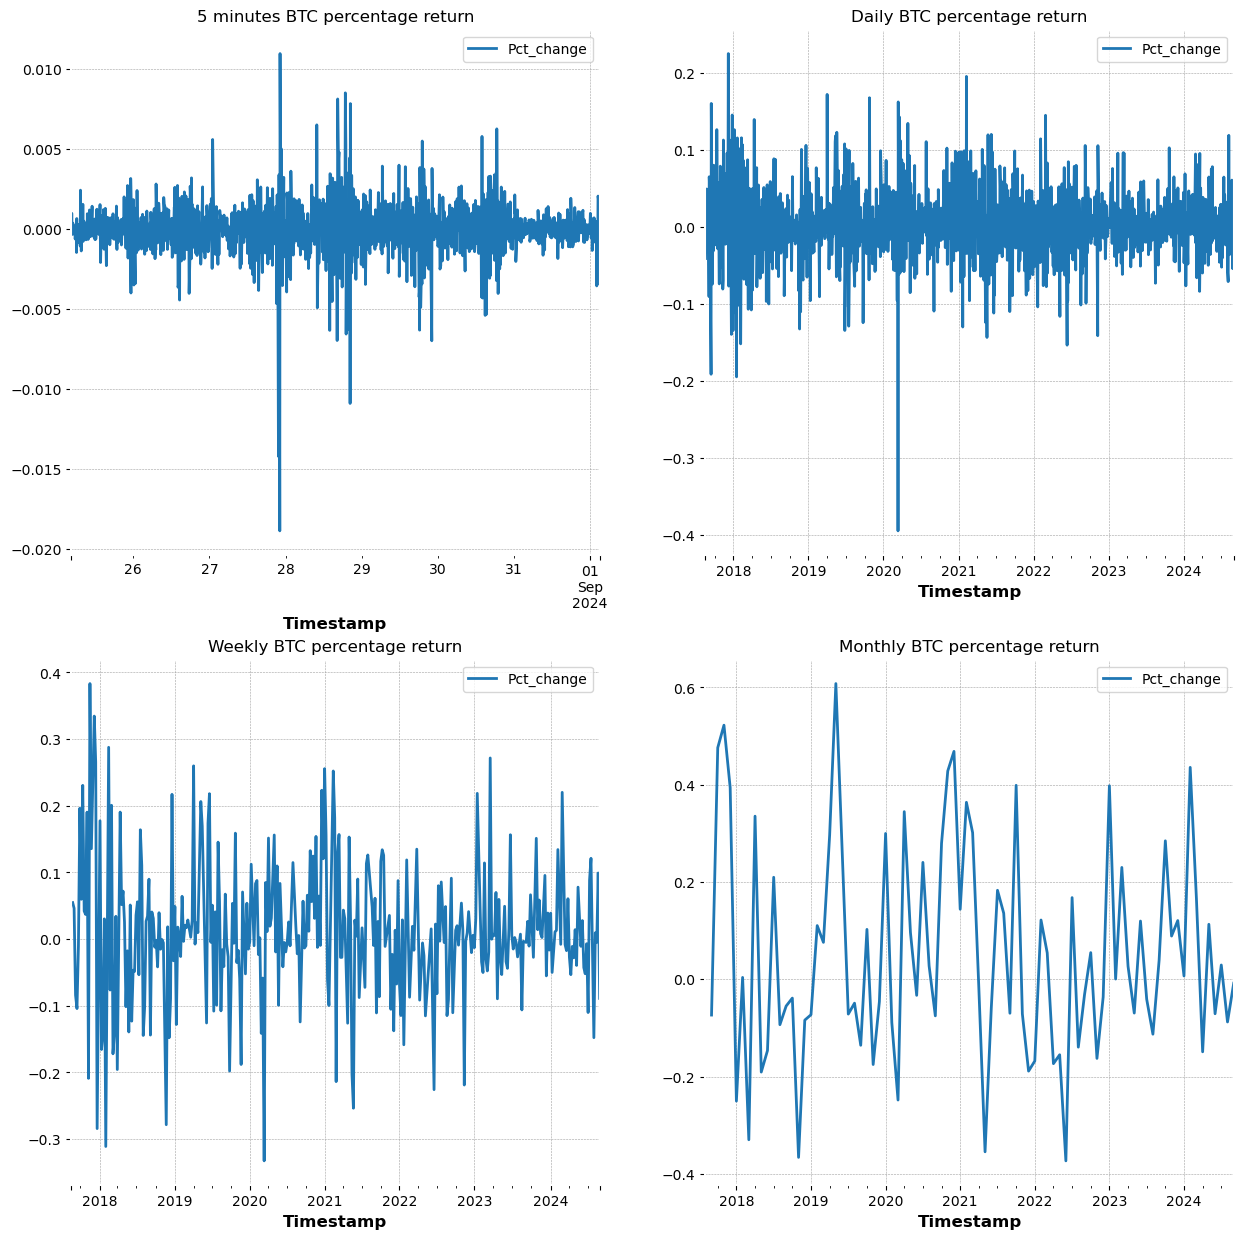

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(15)
fig.set_figwidth(15)

df_5min[-2000:]['Pct_change'].plot(ax=axes[0,0], legend=True)
axes[0,0].set_title('5 minutes BTC percentage return')

df_daily['Pct_change'].plot(ax=axes[0,1], legend=True)
axes[0,1].set_title('Daily BTC percentage return')

df_weekly['Pct_change'].plot(ax=axes[1,0], legend=True)
axes[1,0].set_title('Weekly BTC percentage return')

df_monthly['Pct_change'].plot(ax=axes[1,1], legend=True)
axes[1,1].set_title('Monthly BTC percentage return')

### 3. Visualize BTC percentage return histogram 

Text(0.5, 1.0, 'Monthly BTC percentage return (%)')

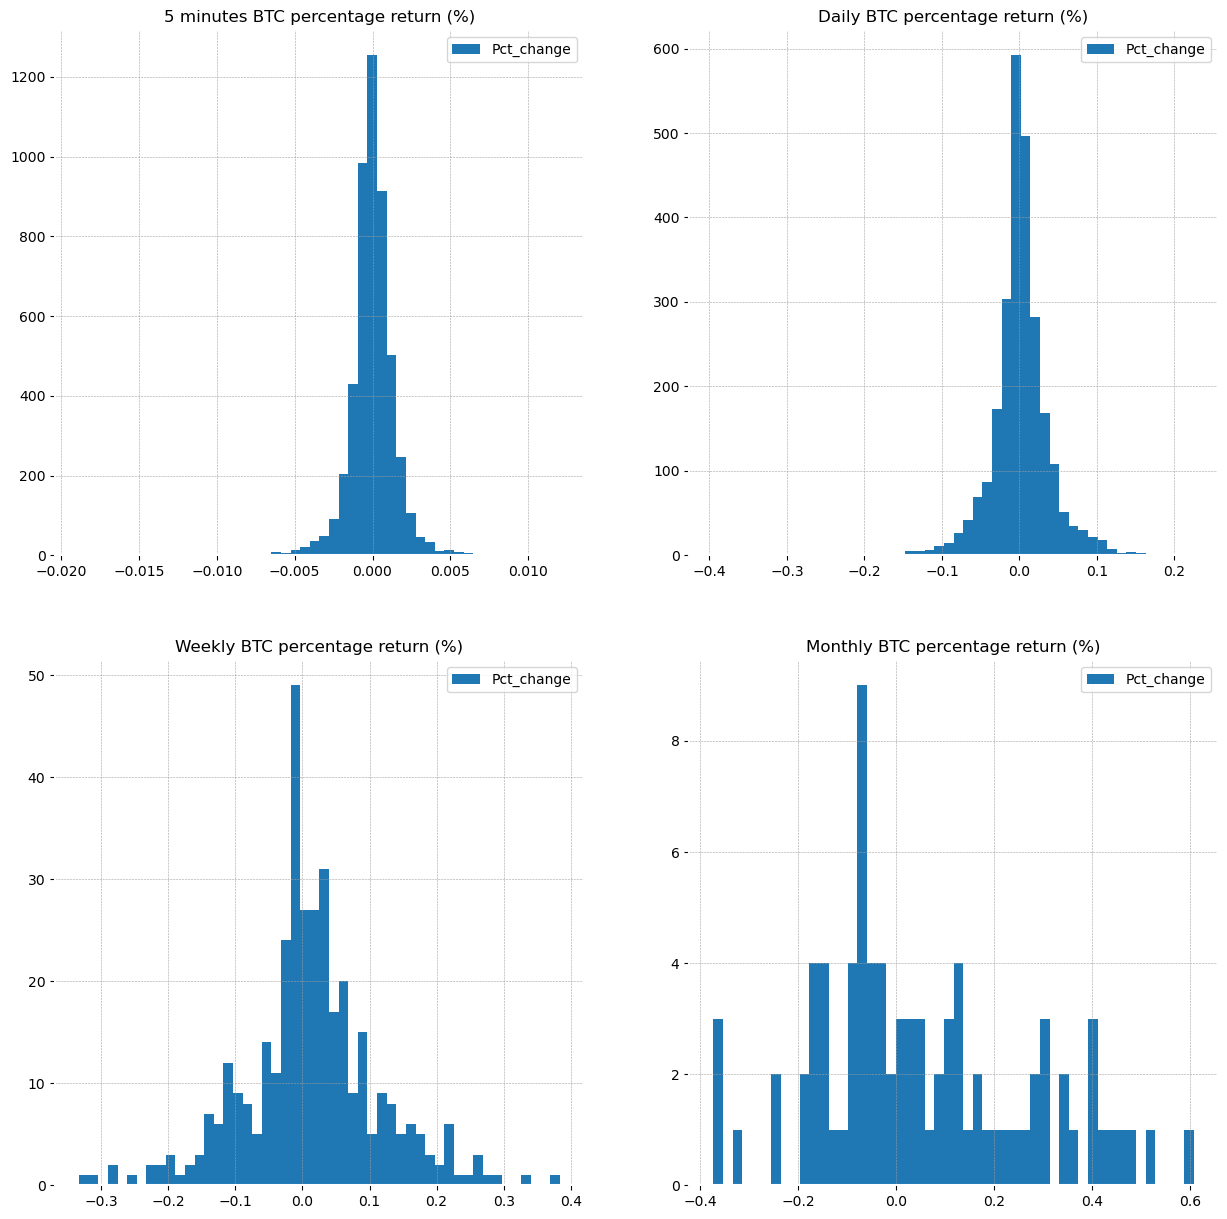

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(15)
fig.set_figwidth(15)

df_5min[-5000:]['Pct_change'].hist(bins=50, ax=axes[0,0], legend=True)
axes[0,0].set_title('5 minutes BTC percentage return (%)')

df_daily['Pct_change'].hist(bins=50, ax=axes[0,1], legend=True)
axes[0,1].set_title('Daily BTC percentage return (%)')

df_weekly['Pct_change'].hist(bins=50, ax=axes[1,0], legend=True)
axes[1,0].set_title('Weekly BTC percentage return (%)')

df_monthly['Pct_change'].hist(bins=50, ax=axes[1,1], legend=True)
axes[1,1].set_title('Monthly BTC percentage return (%)')

## Prediction

### Prediction on 5-min Level

In [17]:
df_5min = df_5min.dropna()
df_5min.reset_index(inplace=True)
df_5min

,Timestamp,Open,Close,High,Low,Volume,MA20,MA50,MA200,Pct_change
0,2017-08-17 20:35:00,4302.96,4303.18,4303.18,4262.53,2.618420,4289.6590,4299.1926,4362.97010,0.000051
1,2017-08-17 20:40:00,4310.99,4305.00,4325.24,4302.50,5.240749,4294.8720,4298.5468,4363.18770,0.000423
2,2017-08-17 20:45:00,4305.00,4325.24,4325.24,4305.00,5.188388,4299.0075,4298.6070,4363.50650,0.004702
3,2017-08-17 20:50:00,4325.24,4341.30,4341.30,4325.24,1.737671,4301.9790,4299.4272,4363.90560,0.003713
4,2017-08-17 20:55:00,4341.30,4346.74,4354.84,4326.00,1.855561,4306.0160,4299.5994,4364.33190,0.001253
...,...,...,...,...,...,...,...,...,...,...
732211,2024-09-01 02:40:00,58504.00,58480.00,58560.18,58470.50,75.080410,58735.0430,58880.5722,58989.62295,-0.000410
732212,2024-09-01 02:45:00,58480.00,58440.00,58490.00,58429.47,38.878760,58710.7935,58868.3324,58987.19295,-0.000684
732213,2024-09-01 02:50:00,58440.00,58529.99,58530.00,58440.00,39.561720,58693.4690,58858.2524,58984.83845,0.001540
732214,2024-09-01 02:55:00,58530.00,58540.25,58548.86,58510.90,48.654640,58674.5955,58848.4978,58982.38970,0.000175


In [18]:
df_5min1 = df_5min

# Remove unuse columns
df_5min = df_5min.drop(columns=['Timestamp', 'Open', 'High', 'Low', 'Pct_change'])
df_5min.head()

,Close,Volume,MA20,MA50,MA200
0,4303.18,2.618420,4289.6590,4299.1926,4362.9701
1,4305.00,5.240749,4294.8720,4298.5468,4363.1877
2,4325.24,5.188388,4299.0075,4298.6070,4363.5065
3,4341.30,1.737671,4301.9790,4299.4272,4363.9056
4,4346.74,1.855561,4306.0160,4299.5994,4364.3319


In [19]:
item_predictor_list = ['Close', 'Volume', 'MA20', 'MA50', 'MA200']
item_target_list = ['Close']

# Define lag features
n_lag = 30
n_predict = 1
num_features = len(item_predictor_list)
target_data = pd.DataFrame()

for item in item_predictor_list:
    for i in range(1, n_lag + 1):
        df_5min[f'{item}_lag_{i}'] = df_5min[f'{item}'].shift(i)
        
for item in item_target_list:
    for i in range(1, n_predict+1):
        target_data[f'{item}_t+{i}'] = df_5min[f'{item}'].shift(-i)

C:\Users\ychong4\AppData\Local\Temp\ipykernel_8944\2744392564.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_5min[f'{item}_lag_{i}'] = df_5min[f'{item}'].shift(i)
C:\Users\ychong4\AppData\Local\Temp\ipykernel_8944\2744392564.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_5min[f'{item}_lag_{i}'] = df_5min[f'{item}'].shift(i)
C:\Users\ychong4\AppData\Local\Temp\ipykernel_8944\2744392564.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, whi

C:\Users\ychong4\AppData\Local\Temp\ipykernel_8944\2744392564.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_5min[f'{item}_lag_{i}'] = df_5min[f'{item}'].shift(i)
C:\Users\ychong4\AppData\Local\Temp\ipykernel_8944\2744392564.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_5min[f'{item}_lag_{i}'] = df_5min[f'{item}'].shift(i)
C:\Users\ychong4\AppData\Local\Temp\ipykernel_8944\2744392564.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, whi

In [20]:
df_5min = df_5min[n_lag:-n_predict]
df_5min = df_5min.reset_index(drop=True)
target_data = target_data[n_lag:-n_predict]
target_data = target_data.reset_index(drop=True)

In [21]:
rows_with_null = df_5min[df_5min.isnull().any(axis=1)]
rows_with_null

,Close,Volume,MA20,MA50,MA200,Close_lag_1,Close_lag_2,Close_lag_3,Close_lag_4,Close_lag_5,...,MA200_lag_21,MA200_lag_22,MA200_lag_23,MA200_lag_24,MA200_lag_25,MA200_lag_26,MA200_lag_27,MA200_lag_28,MA200_lag_29,MA200_lag_30


In [22]:
df_5min.head()

,Close,Volume,MA20,MA50,MA200,Close_lag_1,Close_lag_2,Close_lag_3,Close_lag_4,Close_lag_5,...,MA200_lag_21,MA200_lag_22,MA200_lag_23,MA200_lag_24,MA200_lag_25,MA200_lag_26,MA200_lag_27,MA200_lag_28,MA200_lag_29,MA200_lag_30
0,4336.28,3.479181,4339.3180,4320.1358,4368.76720,4336.80,4336.80,4352.34,4341.30,4352.34,...,4365.95600,4365.70170,4365.40360,4365.0471,4364.65935,4364.33190,4363.90560,4363.50650,4363.18770,4362.9701
1,4323.31,9.009374,4338.0170,4322.5872,4368.78460,4336.28,4336.80,4336.80,4352.34,4341.30,...,4366.24260,4365.95600,4365.70170,4365.4036,4365.04710,4364.65935,4364.33190,4363.90560,4363.50650,4363.1877
2,4337.36,7.532349,4337.1070,4324.4838,4368.74415,4323.31,4336.28,4336.80,4336.80,4352.34,...,4366.42125,4366.24260,4365.95600,4365.7017,4365.40360,4365.04710,4364.65935,4364.33190,4363.90560,4363.5065
3,4337.38,7.238818,4336.2585,4325.5940,4368.70380,4337.36,4323.31,4336.28,4336.80,4336.80,...,4366.65490,4366.42125,4366.24260,4365.9560,4365.70170,4365.40360,4365.04710,4364.65935,4364.33190,4363.9056
4,4327.89,6.364666,4334.9020,4326.8318,4368.69265,4337.38,4337.36,4323.31,4336.28,4336.80,...,4366.90510,4366.65490,4366.42125,4366.2426,4365.95600,4365.70170,4365.40360,4365.04710,4364.65935,4364.3319


In [23]:
target_data.head()

,Close_t+1
0,4323.31
1,4337.36
2,4337.38
3,4327.89
4,4332.26


In [24]:
# Split data as 95% for train and val, and 5% for test
trainval_len = int(len(df_5min) * 0.95)
test_len = int(len(df_5min) * 0.05)

In [25]:
# Define X and Y 
X = df_5min
Y = target_data

In [26]:
# Use 95% of data for training and validation set
X_trainVal = X[:trainval_len]
X_test = X[trainval_len:]
Y_trainVal = Y[:trainval_len]
Y_test = Y[trainval_len:]

print("Daily dataset length:", len(df_5min))
print("Train and validation set length:",len(X_trainVal))
print("Test set length:",len(X_test))

Daily dataset length: 732185
Train and validation set length: 695575
Test set length: 36610


In [27]:
Y_trainVal

,Close_t+1
0,4323.31
1,4337.36
2,4337.38
3,4327.89
4,4332.26
...,...
695570,63806.26
695571,63770.01
695572,63785.30
695573,63784.47


In [28]:
# Scale variables using train and val set. Set the test set aside.
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

X_trainVal_transformed = scaler_x.fit_transform(X_trainVal)
X_test_transformed = scaler_x.transform(X_test)
Y_trainVal_transformed = scaler_y.fit_transform(Y_trainVal)
Y_test_transformed = scaler_y.transform(Y_test)

In [29]:
# Define and build the LSTM model
model = Sequential()
model.add(LSTM(units=64, activation='relu', input_shape=(n_lag+1, num_features), return_sequences=True))
model.add(LSTM(units=32, activation='relu', return_sequences=False))
model.add(Dense(n_predict))
model.compile(optimizer='adam', loss='mean_absolute_error')

In [30]:
# Split trainval set into 95% train and 5% val 
X_train = X_trainVal_transformed[:int(len(X_trainVal_transformed)*0.95)]
X_val = X_trainVal_transformed[int(len(X_trainVal_transformed)*0.95):]
X_test = X_test_transformed
Y_train = Y_trainVal_transformed[:int(len(Y_trainVal_transformed)*0.95)]
Y_val = Y_trainVal_transformed[int(len(Y_trainVal_transformed)*0.95):]
Y_test = Y_test_transformed

In [31]:
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_val shape:", X_val.shape)
print("Y_val shape:", Y_val.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (660796, 155)
Y_train shape: (660796, 1)
X_val shape: (34779, 155)
Y_val shape: (34779, 1)
X_test shape: (36610, 155)
Y_test shape: (36610, 1)


In [32]:
def get_callback():
    return[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                         patience=3),
    ]

In [33]:
# Reshape the input data to fit the LSTM input shape
X_train = X_train.reshape(X_train.shape[0], n_lag+1, num_features)
X_val = X_val.reshape(X_val.shape[0], n_lag+1, num_features)
X_test = X_test.reshape(X_test.shape[0], n_lag+1, num_features)

# Train the LSTM model
model.fit(X_train, Y_train, 
          validation_data = [X_val, Y_val],
          epochs=100, batch_size=32, verbose=2,
          callbacks=get_callback())

Epoch 1/100
20650/20650 - 618s - loss: 0.0035 - val_loss: 0.0036 - 618s/epoch - 30ms/step
Epoch 2/100
20650/20650 - 623s - loss: 0.0020 - val_loss: 0.0025 - 623s/epoch - 30ms/step
Epoch 3/100
20650/20650 - 617s - loss: 0.0014 - val_loss: 0.0072 - 617s/epoch - 30ms/step
Epoch 4/100
20650/20650 - 618s - loss: 0.0011 - val_loss: 0.0035 - 618s/epoch - 30ms/step
Epoch 5/100
20650/20650 - 613s - loss: 0.0010 - val_loss: 0.0012 - 613s/epoch - 30ms/step
Epoch 6/100
20650/20650 - 617s - loss: 9.2696e-04 - val_loss: 0.0013 - 617s/epoch - 30ms/step
Epoch 7/100
20650/20650 - 620s - loss: 8.6885e-04 - val_loss: 0.0019 - 620s/epoch - 30ms/step
Epoch 8/100
20650/20650 - 620s - loss: 8.4489e-04 - val_loss: 0.0012 - 620s/epoch - 30ms/step


In [34]:
# Make predictions using the val set
Y_pred_val = model.predict(X_val)
Y_pred_val = scaler_y.inverse_transform(Y_pred_val) # Inverse scaling to get the original values
Y_val = scaler_y.inverse_transform(Y_val)

# Calculate the mean squared error
mae_val = mean_absolute_error(Y_val, Y_pred_val)
print(f"Mean Absolute Error: {mae_val}")

1087/1087 [==============================] - 12s 11ms/step
Mean Absolute Error: 84.52012907843097


In [35]:
# Make predictions using the test set
Y_pred = model.predict(X_test)
Y_pred = scaler_y.inverse_transform(Y_pred) # Inverse scaling to get the original values
Y_test = scaler_y.inverse_transform(Y_test)
Y_train = scaler_y.inverse_transform(Y_train)

# Calculate the mean squared error
mae = mean_absolute_error(Y_test, Y_pred)
print(f"Mean Absolute Error: {mae}")

1145/1145 [==============================] - 13s 11ms/step
Mean Absolute Error: 81.04608980213742


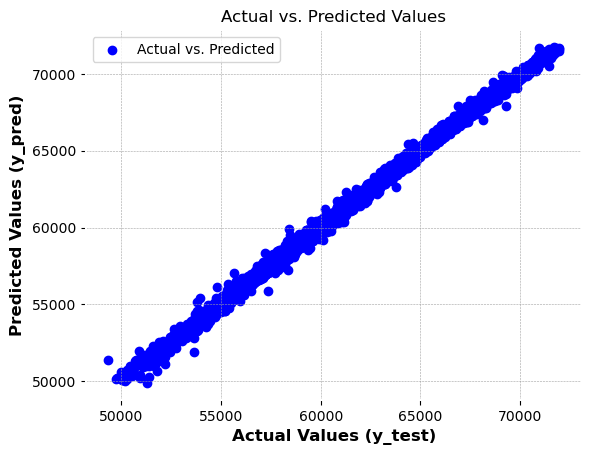

In [36]:
# Create a scatter plot
plt.scatter(Y_test[:,0], Y_pred[:,0], c='b', label='Actual vs. Predicted')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.legend()
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()

## Plot the predictions

In [37]:
df_pred = pd.DataFrame({'Actual': Y_train[:,0]})
df_pred

,Actual
0,4323.31
1,4337.36
2,4337.38
3,4327.89
4,4332.26
...,...
660791,43230.26
660792,43246.00
660793,43261.10
660794,43209.60


In [38]:
df_val_dummy = pd.DataFrame({'Actual': Y_val[:,0], 'Pred': Y_pred_val[:,0]})
df_test_dummy = pd.DataFrame({'Actual': Y_test[:,0], 'Pred': Y_pred[:,0]})

In [39]:
df_pred = pd.concat([df_pred, df_val_dummy, df_test_dummy]).reset_index(drop=True)

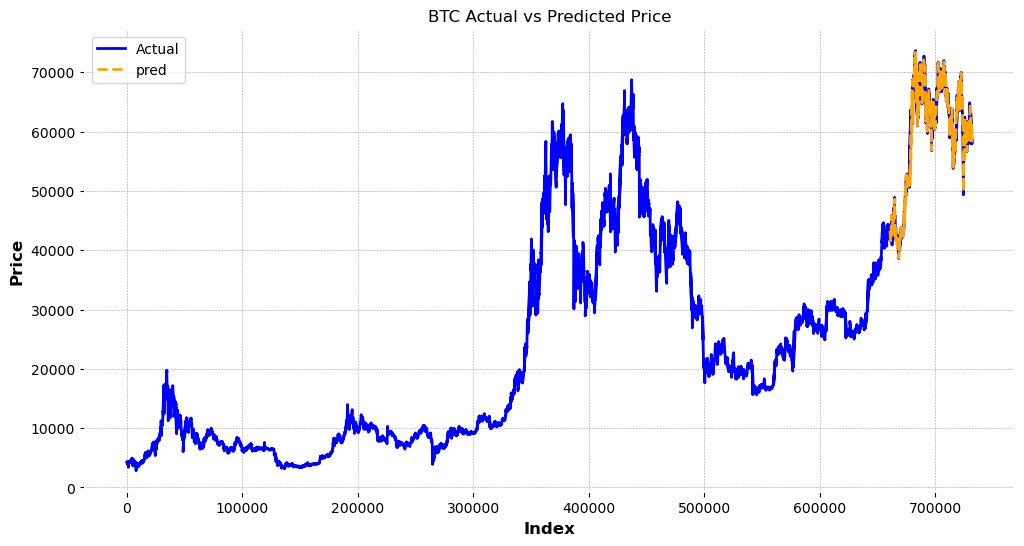

In [40]:
# Plotting
plt.figure(figsize=(12,6))
plt.plot(df_pred.index, df_pred['Actual'], label='Actual', color='blue')
plt.plot(df_pred.index, df_pred['Pred'], label='pred', color='orange', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('BTC Actual vs Predicted Price')
plt.legend()
plt.grid(True)

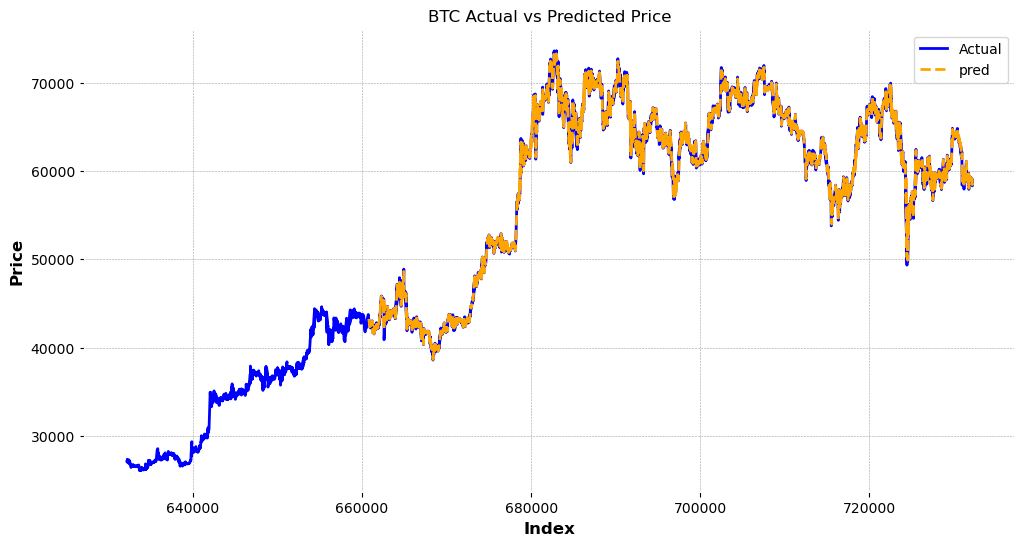

In [41]:
# A clearer plot
plt.figure(figsize=(12,6))
plt.plot(df_pred[-100000:].index, df_pred[-100000:]['Actual'], label='Actual', color='blue')
plt.plot(df_pred[-100000:].index, df_pred[-100000:]['Pred'], label='pred', color='orange', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('BTC Actual vs Predicted Price')
plt.legend()
plt.grid(True)

## Conclusion

- In this notebook, we used LSTM model for the 5-minute interval prediction for Bitcoin price.
- The variables n_lag = 30, and n_predict = 1 can be changed to expand the prediction interval. For example, using n_lag = 1, n_predict = 1 means to use one 5-minute historical data to predict one 5-minute future price.
- These lag/predict variables, as well as the LSTM model parameters can be changed to tune the model performance.